In [14]:
# Project imports
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.model_selection
import sklearn.linear_model

In [15]:
# Load data
data = pandas.read_csv('../input/seattle/listings.csv')

In [16]:
# Reduce data to only the relevant columns
print(data.columns)
all_columns = ['property_type', 'room_type', 'zipcode', 
           'bedrooms', 'beds', 'bathrooms', 'accommodates', 'guests_included', 'extra_people', 
           'review_scores_rating', 'host_response_rate', 
           'security_deposit', 'cleaning_fee','price']
reduced_data = data[all_columns]
print(reduced_data)

# See number of NaN values per column
for c in reduced_data.columns:
    print(c)
    print(reduced_data[c].value_counts(dropna = False))

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [17]:
# View all unique values for each column
for c in reduced_data.columns:
    print(c)
    print(reduced_data[c].unique())

property_type
['Apartment' 'House' 'Cabin' 'Condominium' 'Camper/RV' 'Bungalow'
 'Townhouse' 'Loft' 'Boat' 'Bed & Breakfast' 'Other' 'Dorm' 'Treehouse'
 'Yurt' 'Chalet' 'Tent' nan]
room_type
['Entire home/apt' 'Private room' 'Shared room']
zipcode
['98119' '98109' '98107' '98117' nan '98103' '98105' '98115' '98101'
 '98122' '98112' '98144' '99\n98122' '98121' '98102' '98199' '98104'
 '98134' '98136' '98126' '98146' '98116' '98177' '98118' '98108' '98133'
 '98106' '98178' '98125']
bedrooms
[ 1.  5.  0.  3.  2.  6.  4. nan  7.]
beds
[ 1.  7.  2.  3. 15.  5.  4.  6.  9.  8. nan 10.]
bathrooms
[1.  4.5 2.  3.5 1.5 2.5 3.  0.5 4.  0.  8.  nan 5. ]
accommodates
[ 4 11  3  6  2  5 16 10  1  8  7 12  9 15 14]
guests_included
[ 2  1 10  6  4  8  3  7  0  5  9 11 15 13 12]
extra_people
['$5.00' '$0.00' '$25.00' '$15.00' '$30.00' '$10.00' '$20.00' '$50.00'
 '$60.00' '$75.00' '$100.00' '$35.00' '$40.00' '$45.00' '$7.00' '$14.00'
 '$55.00' '$18.00' '$29.00' '$12.00' '$19.00' '$8.00' '$21.00' '$26.0

In [18]:
# Clean the data
cleaned_data = reduced_data
print(cleaned_data.shape)
# Property type: Reduce to only apartment or house
cleaned_data = cleaned_data[(cleaned_data.property_type == 'Apartment') | (cleaned_data.property_type == 'House')]

# Zipcode: Remove mistyped values ('99\n98122')
cleaned_data = cleaned_data[cleaned_data.zipcode != '99\n98122'] 

# Remove dollar and percentage signs from data
for c in reduced_data.columns:
    cleaned_data[c] = cleaned_data[c].replace('[\$,]', '', regex=True)
    cleaned_data[c] = cleaned_data[c].replace('[\%,]', '', regex=True)
    
# Security deposity & cleaning fee: Convert NaN to 0
cleaned_data['security_deposit'].fillna(value=0)
cleaned_data['cleaning_fee'].fillna(value=0)
    
# Remove all data w/ NaN values
saved_data = cleaned_data # Dropping all rows w/ NaN loses a lot of data; save this data so we can reuse some of these rows once the 
cleaned_data = cleaned_data.dropna()

# View all unique values again
for c in cleaned_data.columns:
    print(c)
    print(cleaned_data[c].unique())
print(cleaned_data.shape)

(3818, 14)
property_type
['Apartment' 'House']
room_type
['Entire home/apt' 'Private room' 'Shared room']
zipcode
['98119' '98107' '98117' '98109' '98103' '98105' '98115' '98122' '98112'
 '98144' '98121' '98101' '98102' '98199' '98104' '98134' '98136' '98146'
 '98116' '98126' '98177' '98108' '98118' '98133' '98106' '98178' '98125']
bedrooms
[1. 5. 3. 2. 6. 4. 0. 7.]
beds
[ 1.  7.  3. 15.  5.  2.  4.  6.  8.  9. 10.]
bathrooms
[1.  4.5 2.  3.5 2.5 1.5 3.  4.  0.5]
accommodates
[ 4 11  6  2  5 16  8  7 12  3 10  1  9 15 14]
guests_included
[ 1 10  6  4  8  7  2  0  9  3  5 13 12]
extra_people
['0.00' '25.00' '15.00' '20.00' '50.00' '60.00' '75.00' '10.00' '100.00'
 '30.00' '40.00' '45.00' '35.00' '5.00' '7.00' '14.00' '55.00' '19.00'
 '12.00' '29.00' '28.00' '17.00' '18.00' '9.00' '8.00' '13.00' '16.00'
 '33.00' '49.00' '22.00' '68.00' '175.00']
review_scores_rating
[ 96.  97.  92.  98. 100.  95.  88.  75.  90.  94.  91.  77.  99.  84.
  93.  87.  80.  89.  76.  83.  78.  66.  73.  82.  

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


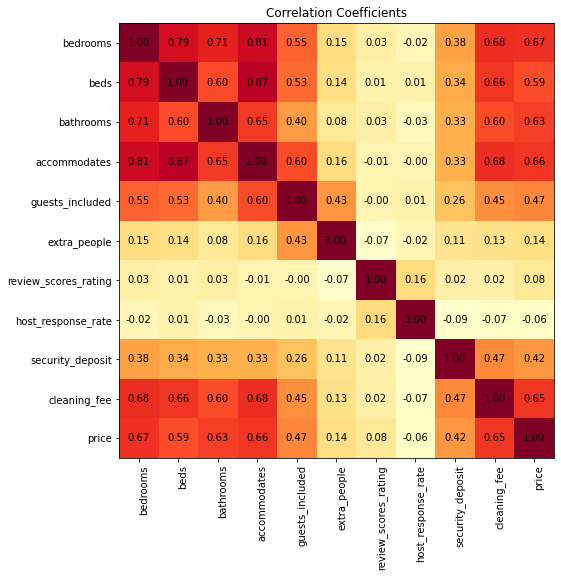

In [19]:
# Determine and display Pearson correlation coefficients for numeric data
numeric_columns = ['bedrooms', 'beds', 'bathrooms', 'accommodates', 'guests_included', 'extra_people', 
           'review_scores_rating', 'host_response_rate', 
           'security_deposit', 'cleaning_fee','price']

# Convert string values to float values for each numeric column
for c in numeric_columns:
    cleaned_data[c] = cleaned_data[c].astype(float)
    
correlations = np.corrcoef(cleaned_data[numeric_columns].values.T)

# Create heatmap
fig, ax = plt.subplots(figsize=(16,8))
im = ax.imshow(correlations, cmap='YlOrRd')

# Set axes
ax.set_xticks(np.arange(len(numeric_columns)))
ax.set_yticks(np.arange(len(numeric_columns)))
ax.set_xticklabels(numeric_columns)
ax.set_yticklabels(numeric_columns)
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") # Rotate x-axis

# Loop over data dimensions and create text annotations.
for i in range(len(numeric_columns)):
    for j in range(len(numeric_columns)):
        text = ax.text(j, i, '{:.2f}'.format(correlations[i, j]),ha="center", va="center", color="black")

ax.set_title("Correlation Coefficients")
plt.show()

In [20]:
# Use only the selected features
# Based on correlation coefficients and relevant categorical data
selected_columns = ['property_type', 'room_type', 'zipcode', 'bedrooms', 'beds', 'price']
selected_data = saved_data[selected_columns]
# Re-drop NaN values
selected_data = selected_data.dropna()
# Re-convert string values to float values for each numeric column
numeric_columns = ['bedrooms', 'beds', 'price']
for c in numeric_columns:
    selected_data[c] = selected_data[c].astype(float)
print(selected_data.shape)

(3429, 6)


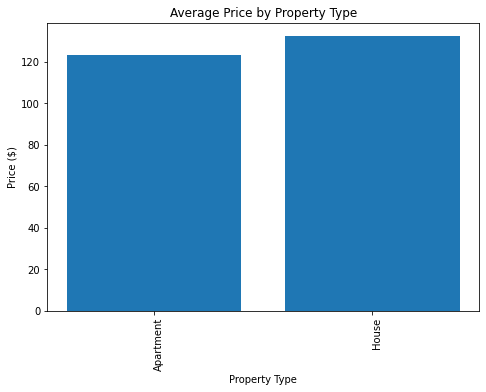

In [21]:
# Explore the data visually
# Display bar chart for property_type
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

types = selected_data.property_type.unique()

# Calculate arithmetic mean for each property type
averages = []
for type in types:
    df = selected_data[selected_data.property_type == type]
    prices = df.price
    averages.append(np.mean(prices))
    
ax.bar(types, averages)
ax.set_title('Average Price by Property Type')
ax.set_xlabel('Property Type')
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") # Rotate x-axis
ax.set_ylabel('Price ($)')
plt.show()

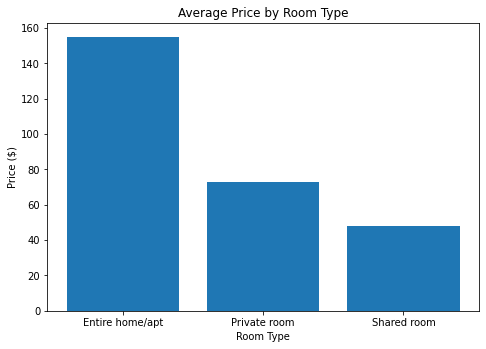

In [22]:
# Display bar chart for room_type
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

types = selected_data.room_type.unique()

# Calculate arithmetic mean for each room type
averages = []
for type in types:
    df = selected_data[selected_data.room_type == type]
    prices = df.price
    averages.append(np.mean(prices))
    
ax.bar(types, averages)
ax.set_title('Average Price by Room Type')
ax.set_xlabel('Room Type')
ax.set_ylabel('Price ($)')
plt.show()

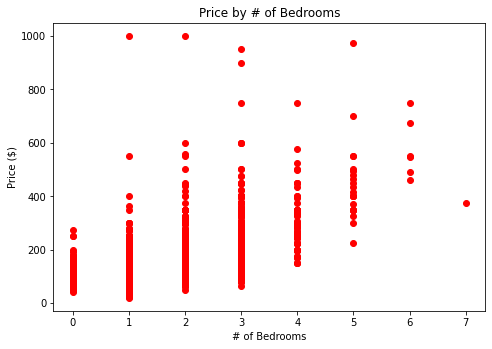

In [23]:
# Display scatter plot for bedrooms
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(selected_data['bedrooms'], selected_data['price'], color='r')
ax.set_xlabel('# of Bedrooms')
ax.set_ylabel('Price ($)')
ax.set_title('Price by # of Bedrooms')
plt.show()

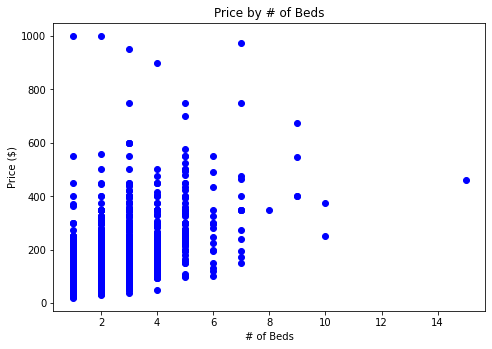

In [24]:
# Display scatter plot for beds
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(selected_data['beds'], selected_data['price'], color='b')
ax.set_xlabel('# of Beds')
ax.set_ylabel('Price ($)')
ax.set_title('Price by # of Beds')
plt.show()

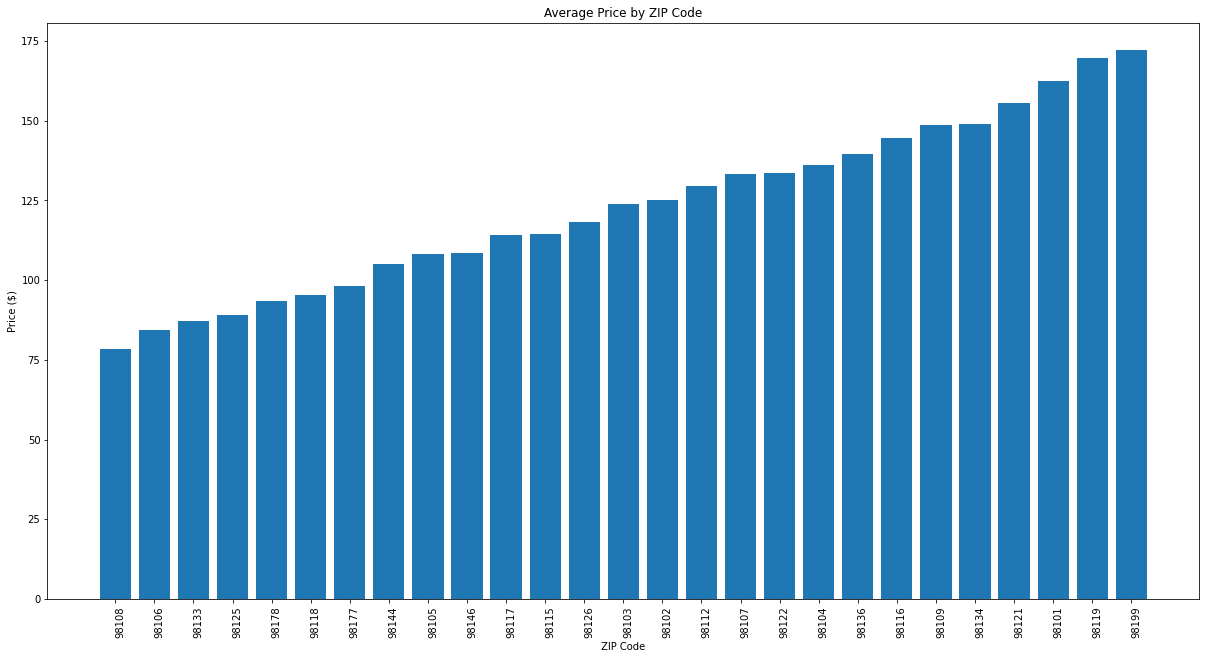

In [25]:
# Display bar chart of average price per zipcode
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])
zipcodes = selected_data.zipcode.unique()

# Calculate arithmetic mean for each zipcode
averages = []
for zip in zipcodes:
    df = selected_data[selected_data.zipcode == zip]
    prices = df.price
    averages.append(np.mean(prices))
    
# Order by price
combined = pandas.DataFrame({
    'zipcode': zipcodes,
    'average': averages
})
combined = combined.sort_values(by=['average'])

ax.bar(combined['zipcode'], combined['average'])
ax.set_title('Average Price by ZIP Code')
ax.set_xlabel('ZIP Code')
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") # Rotate x-axis
ax.set_ylabel('Price ($)')
plt.show()

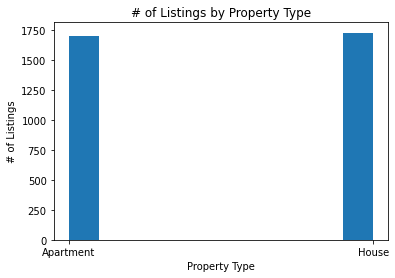

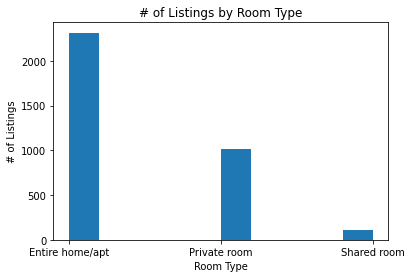

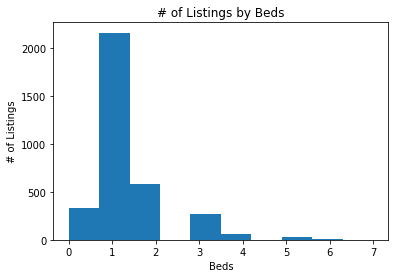

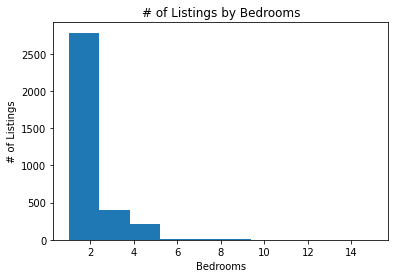

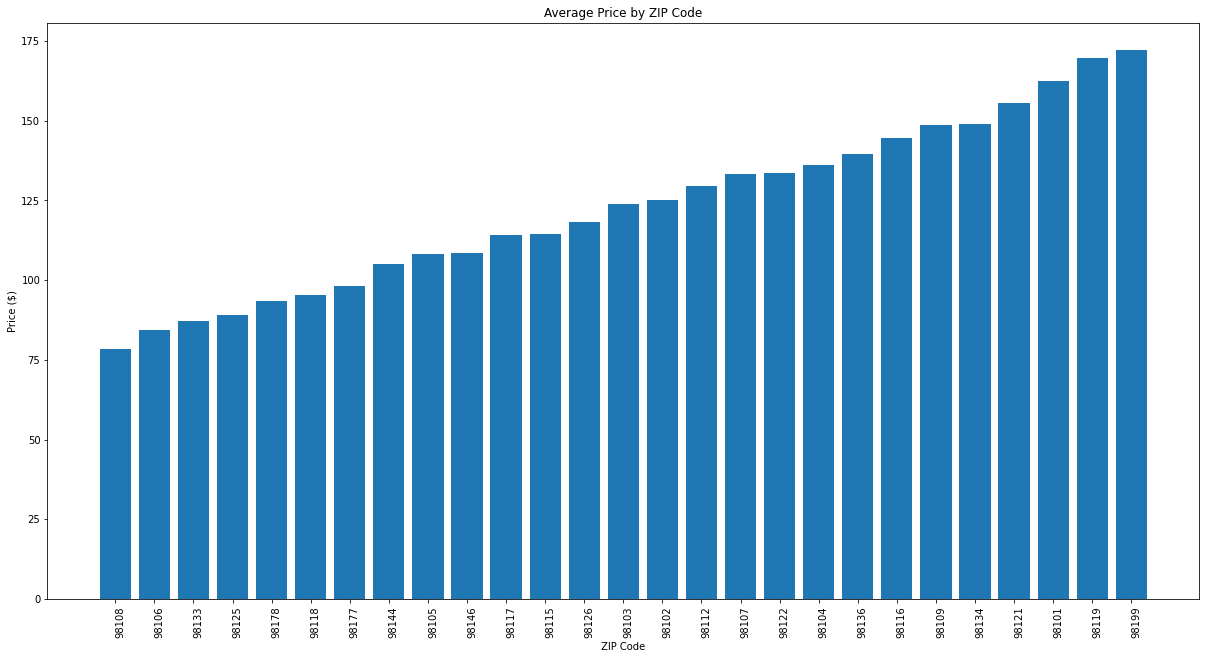

In [26]:
# Display listing count histograms for each selected feature
def render_hist(column, name):
    plt.hist(selected_data[column])
    plt.xlabel(name)
    plt.ylabel('# of Listings')
    plt.title('# of Listings by {}'.format(name))
    plt.show()

render_hist('property_type', 'Property Type')
render_hist('room_type', 'Room Type')
#render_hist('zipcode', 'ZIP Code')
render_hist('bedrooms', 'Beds')
render_hist('beds', 'Bedrooms')

# Render ZIPs as bar chart
fig = plt.figure(figsize=(16,8))

ax = fig.add_axes([0,0,1,1])
zipcodes = selected_data.zipcode.unique()

# Calculate arithmetic mean for each zipcode
counts = []
for zip in zipcodes:
    counts.append(selected_data[selected_data.zipcode == zip].count())
    
# Order by price
combined = pandas.DataFrame({
    'zipcode': zipcodes,
    'average': averages
})
combined = combined.sort_values(by=['average'])

ax.bar(combined['zipcode'], combined['average'])
ax.set_title('# of Listings by ZIP Code')
ax.set_xlabel('ZIP Code')
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",rotation_mode="anchor") # Rotate x-axis
ax.set_ylabel('# of Listings')
plt.show()

In [27]:
# Convert categorical data into seperate numeric columns
# Necessary in order to perform multiple linear regression
def break_up_categories(original_column_name):
    categories = selected_data[original_column_name].unique()
    for c in categories:
        selected_data[c] = np.where(selected_data[original_column_name] == c, 1, 0)
    del selected_data[original_column_name] # Remove original categorical column once done
    
break_up_categories('zipcode')
break_up_categories('property_type')
break_up_categories('room_type')
print(selected_data)
print(selected_data.shape)

      bedrooms  beds  price  98119  98109  98107  98117  98103  98105  98115  \
0          1.0   1.0   85.0      1      0      0      0      0      0      0   
1          1.0   1.0  150.0      1      0      0      0      0      0      0   
2          5.0   7.0  975.0      1      0      0      0      0      0      0   
3          0.0   2.0  100.0      1      0      0      0      0      0      0   
4          3.0   3.0  450.0      1      0      0      0      0      0      0   
...        ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
3812       1.0   2.0   95.0      0      0      1      0      0      0      0   
3813       3.0   3.0  359.0      0      0      1      0      0      0      0   
3814       1.0   2.0   79.0      0      0      0      0      0      0      0   
3815       1.0   1.0   93.0      0      0      0      0      0      0      0   
3817       2.0   1.0   87.0      0      1      0      0      0      0      0   

      ...  98108  98133  98106  98178  

In [28]:
# Separate training and testing data
X = selected_data
X = X.drop(columns = 'price')
y = selected_data[['price']]

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = .20)

In [29]:
# Perform multiple linear regression on training data
regr = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Display the coefficients and b value
for i in range(regr.coef_[0].size):
    #print(X_train.columns[i], end="")
    #print(X_train.columns[i])

    #print(":", end="")
    print(regr.coef_[0][i])
print (regr.intercept_)

47.707615983109534
9.527197610054104
-12519911621831.459
-12519911621830.895
-12519911621858.602
-12519911621872.54
-12519911621865.336
-12519911621867.602
-12519911621865.645
-12519911621844.906
-12519911621846.121
-12519911621878.168
-12519911621812.867
-12519911621815.975
-12519911621838.676
-12519911621825.324
-12519911621824.021
-12519911621818.514
-12519911621869.795
-12519911621867.365
-12519911621852.557
-12519911621852.242
-12519911621912.57
-12519911621883.297
-12519911621891.879
-12519911621888.639
-12519911621889.705
-12519911621895.201
-12519911621878.566
-92243414968141.14
-92243414968129.97
208442995016773.0
208442995016729.88
208442995016699.44
[-1.03679668e+14]


In [30]:
# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Evaluate prediction effectiveness with R^2
print('Coefficient of determination: {:2f}'.format(sklearn.metrics.r2_score(y_test, y_pred)))


Coefficient of determination: 0.584845
